# 1.Các yếu tố dữ liệu
**Bộ dữ liệu chứa các trường sau:**

* Timestamp: Thời gian ghi nhận (có thể không cần thiết cho việc xây dựng mô hình).
* Age: Độ tuổi (có thể là yếu tố quan trọng trong việc dự đoán trầm cảm).
* Feeling sad: Cảm thấy buồn (biến nhị phân có thể ảnh hưởng lớn).
* Irritable towards people: Tính dễ cáu gắt với người khác (cũng là biến nhị phân).
* Trouble sleeping at night: Khó ngủ vào ban đêm (biến nhị phân liên quan đến sức khỏe tâm lý).
* Problems concentrating or making decision: Vấn đề trong việc tập trung hoặc ra quyết định (có thể là yếu tố liên quan đến trầm cảm).
* Loss of appetite: Mất cảm giác thèm ăn (biến nhị phân liên quan đến sức khỏe).
* Feeling of guilt: Cảm giác tội lỗi (có thể là triệu chứng của trầm cảm).
* Problems of bonding with people: Vấn đề trong việc gắn kết với người khác (liên quan đến tình trạng xã hội).
* Suicide attempt: Nỗ lực tự tử (biến nhị phân rất quan trọng).
* Depressed: Nhãn đầu ra (biến nhị phân cho biết liệu người dùng có trầm cảm hay không).

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Tải dữ liệu
df = pd.read_csv("D:\\PYTHON\\DAKHMT\\SmartClinic\\data\\TramCam.csv")

# Kiểm tra tên các cột trong DataFrame
print(df.columns)

# Lọc các cột cần thiết
df = df[
    [
        "Age",
        "Feeling sad",
        "Irritable towards people",
        "Trouble sleeping at night",
        "Problems concentrating or making decision",
        "loss of appetite",
        "Feeling of guilt",
        "Problems of bonding with people",
        "Suicide attempt",
        "Depressed",
    ]
]

# Xóa các bảng ghi có giá trị NaN
df = df.dropna()

# Loại bỏ các cột không cần thiết
# (Thực hiện các thao tác khác với df nếu cần)

Index(['Timestamp', 'Age', 'Feeling sad', 'Irritable towards people',
       'Trouble sleeping at night',
       'Problems concentrating or making decision', 'loss of appetite',
       'Feeling of guilt', 'Problems of bonding with people',
       'Suicide attempt', 'Depressed'],
      dtype='object')


In [4]:
# Tạo từ điển ánh xạ tên cột tiếng Anh sang tiếng Việt
column_mapping = {
    "Age": "Tuổi",
    "Feeling sad": "Cảm thấy buồn",
    "Irritable towards people": "Dễ cáu gắt với người khác",
    "Trouble sleeping at night": "Khó ngủ vào ban đêm",
    "Problems concentrating or making decision": "Khó tập trung hoặc quyết định",
    "loss of appetite": "Mất cảm giác ngon miệng",
    "Feeling of guilt": "Cảm giác tội lỗi",
    "Problems of bonding with people": "Khó kết nối với người khác",
    "Suicide attempt": "Cố gắng tự tử",
    "Depressed": "Trầm cảm",
}

# Ánh xạ các cột trong DataFrame
df = df.rename(columns=column_mapping)

c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

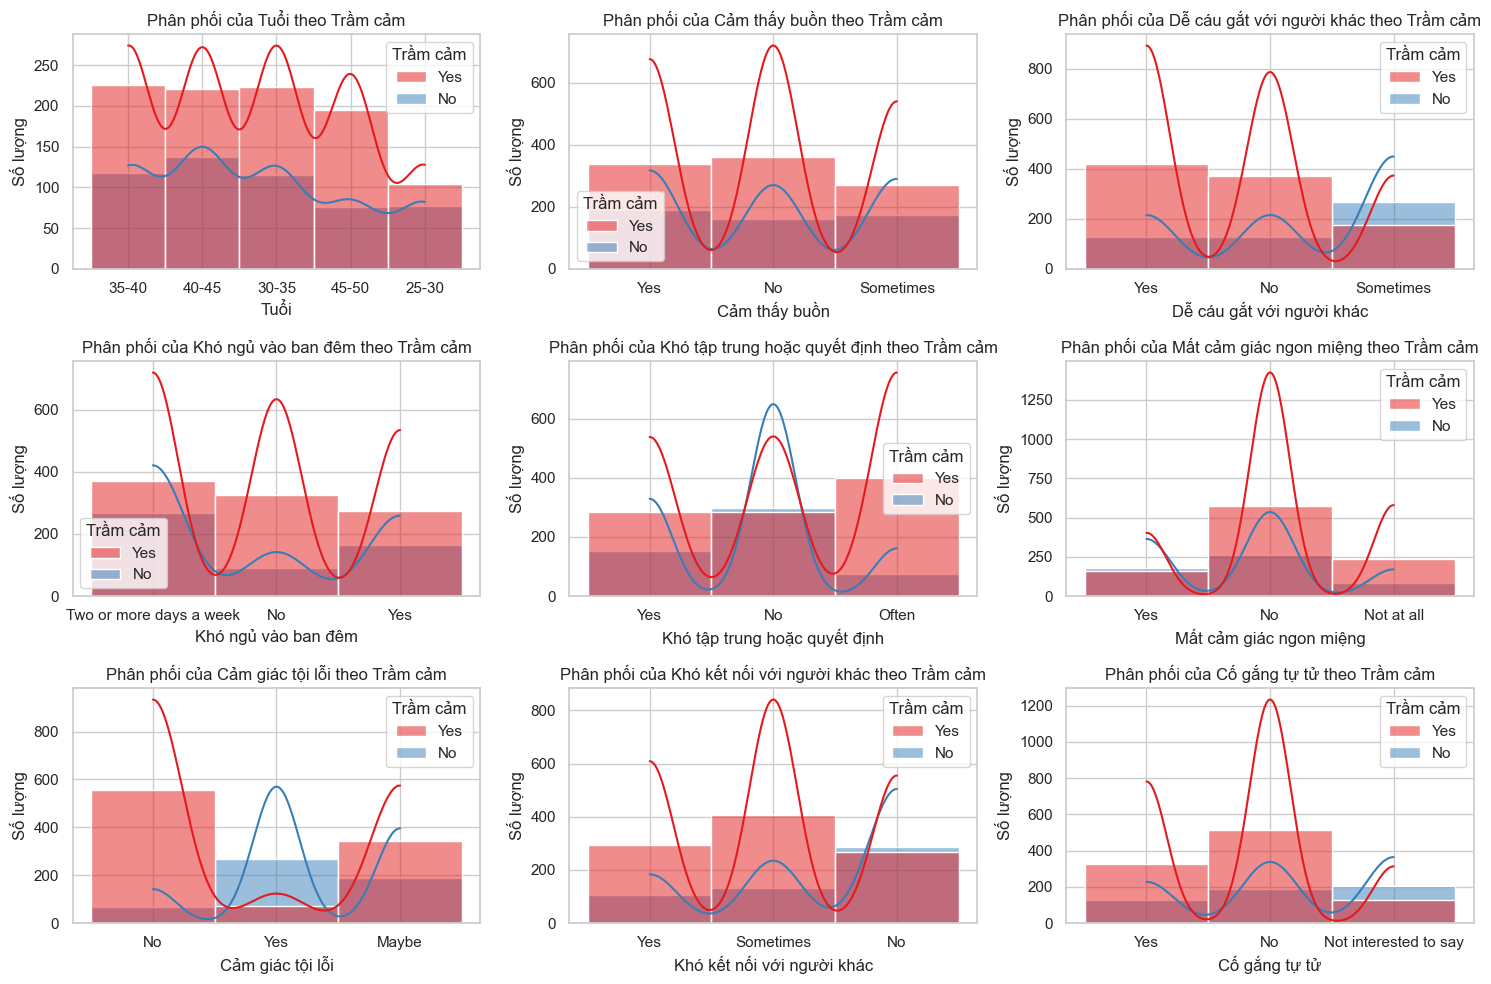

C:\Users\KIKIp\AppData\Local\Temp\ipykernel_18940\2660765613.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Trầm cảm', y=cot, palette="Set2")
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_

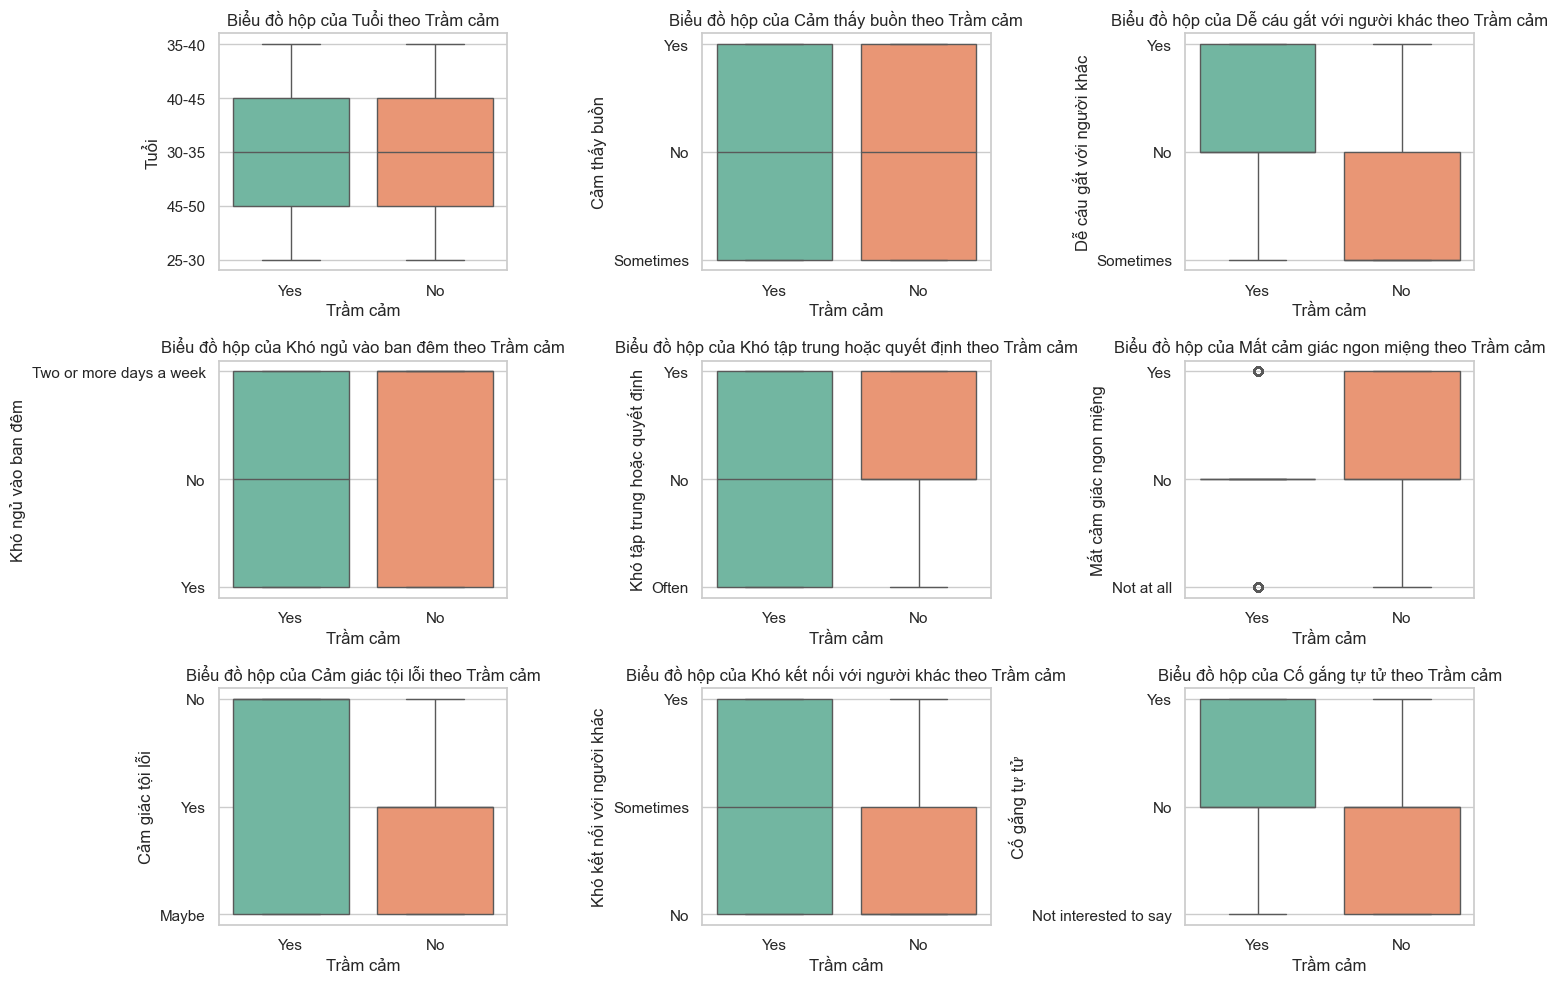

In [6]:
# Thiết lập môi trường vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Bước 1: Biểu đồ phân phối cho từng cột độc lập theo cột Trầm cảm
for i, cot in enumerate(df.columns[:-1]):  # Duyệt qua các cột trừ cột 'Trầm cảm'
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=cot, hue="Trầm cảm", kde=True, palette="Set1")
    plt.title(f"Phân phối của {cot} theo Trầm cảm")
    plt.xlabel(cot)
    plt.ylabel("Số lượng")
    plt.tight_layout()

plt.show()

# Bước 2: Vẽ biểu đồ hộp để xem sự phân bố
plt.figure(figsize=(15, 10))

for i, cot in enumerate(df.columns[:-1]):  # Duyệt qua các cột trừ cột 'Trầm cảm'
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x="Trầm cảm", y=cot, palette="Set2")
    plt.title(f"Biểu đồ hộp của {cot} theo Trầm cảm")
    plt.xlabel("Trầm cảm")
    plt.ylabel(cot)
    plt.tight_layout()

plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1491 non-null   object
 1   Feeling sad                                1491 non-null   object
 2   Irritable towards people                   1491 non-null   object
 3   Trouble sleeping at night                  1491 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   loss of appetite                           1491 non-null   object
 6   Feeling of guilt                           1491 non-null   object
 7   Problems of bonding with people            1491 non-null   object
 8   Suicide attempt                            1491 non-null   object
 9   Depressed                                  1491 non-null   object
dtypes: object(10)
memory usage: 128.1+ KB


In [15]:
df.describe()

,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Problems of bonding with people,Suicide attempt,Depressed
count,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,358,527,549,637,583,835,621,554,703,968


In [9]:
# Lấy và in ra các giá trị duy nhất cho mỗi thuộc tính
for column in df.columns:
    unique_values = df[column].unique()  # Lấy các giá trị duy nhất
    print(f"Giá trị duy nhất trong thuộc tính '{column}': {unique_values}\n")

Giá trị duy nhất trong thuộc tính 'Tuổi': ['35-40' '40-45' '30-35' '45-50' '25-30']

Giá trị duy nhất trong thuộc tính 'Cảm thấy buồn': ['Yes' 'No' 'Sometimes']

Giá trị duy nhất trong thuộc tính 'Dễ cáu gắt với người khác': ['Yes' 'No' 'Sometimes']

Giá trị duy nhất trong thuộc tính 'Khó ngủ vào ban đêm': ['Two or more days a week' 'No' 'Yes']

Giá trị duy nhất trong thuộc tính 'Khó tập trung hoặc quyết định': ['Yes' 'No' 'Often']

Giá trị duy nhất trong thuộc tính 'Mất cảm giác ngon miệng': ['Yes' 'No' 'Not at all']

Giá trị duy nhất trong thuộc tính 'Cảm giác tội lỗi': ['No' 'Yes' 'Maybe']

Giá trị duy nhất trong thuộc tính 'Khó kết nối với người khác': ['Yes' 'Sometimes' 'No']

Giá trị duy nhất trong thuộc tính 'Cố gắng tự tử': ['Yes' 'No' 'Not interested to say']

Giá trị duy nhất trong thuộc tính 'Trầm cảm': ['Yes' 'No']



C:\Users\KIKIp\AppData\Local\Temp\ipykernel_14180\928745028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Depressed'], palette='viridis')
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


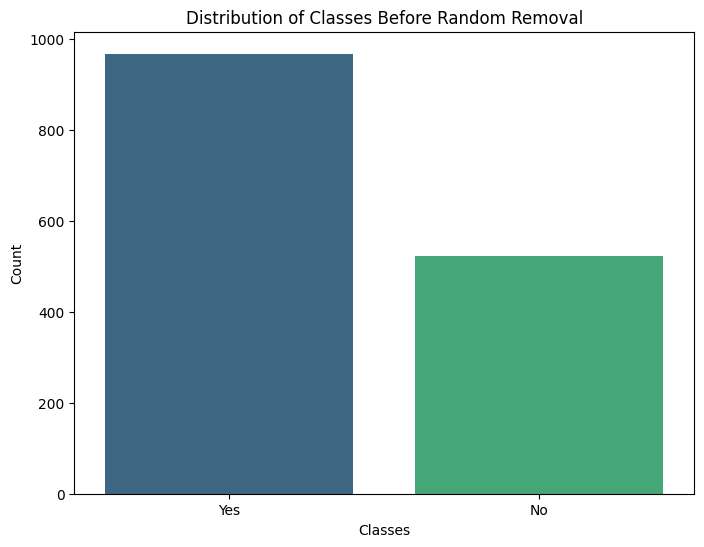

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Depressed"], palette="viridis")
plt.title("Distribution of Classes Before Random Removal")
plt.xlabel("Classes")
plt.ylabel("Count")
# plt.xticks(ticks=[1, 2] labels=['', 'Positive (2)'])
plt.show()

In [24]:
# Biến đổi giá trị categorical thành số
# Đối với cột 'Age', chúng ta có thể ánh xạ giá trị thành các số nguyên tương ứng
age_mapping = {"25-30": 1, "30-35": 2, "35-40": 3, "40-45": 4, "45-50": 5}
df["Age"] = df["Age"].map(age_mapping)

# Đối với các cột khác, sử dụng ánh xạ tương tự
df["Feeling sad"] = df["Feeling sad"].map({"Yes": 1, "No": 0, "Sometimes": 0.5})
df["Irritable towards people"] = df["Irritable towards people"].map(
    {"Yes": 1, "No": 0, "Sometimes": 0.5}
)
df["Trouble sleeping at night"] = df["Trouble sleeping at night"].map(
    {"Two or more days a week": 2, "Yes": 1, "No": 0}
)
df["Problems concentrating or making decision"] = df[
    "Problems concentrating or making decision"
].map({"Yes": 1, "No": 0, "Often": 0.5})
df["loss of appetite"] = df["loss of appetite"].map(
    {"Yes": 1, "No": 0, "Not at all": 0.5}
)
df["Feeling of guilt"] = df["Feeling of guilt"].map({"Yes": 1, "No": 0, "Maybe": 0.5})
df["Problems of bonding with people"] = df["Problems of bonding with people"].map(
    {"Yes": 1, "Sometimes": 0.5, "No": 0}
)
df["Suicide attempt"] = df["Suicide attempt"].map(
    {"Yes": 1, "No": 0, "Not interested to say": 0.5}
)
df["Depressed"] = df["Depressed"].map({"Yes": 1, "No": 0})

# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop(columns=["Depressed"])  # Tính năng đầu vào
y = df["Depressed"]  # Nhãn đầu ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Xây dựng mô hình dự đoán
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 4: Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 93   2]
 [  2 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.99      0.99      0.99       204

    accuracy                           0.99       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.99      0.99      0.99       299



In [1]:
a1 = [[2, 1, 0, 0, 1, 1, 1, 1, 1]]
# Dự đoán trên tập kiểm tra
y_pred_a1 = model.predict(a1)

print(y_pred_a1)

if y_pred_a1 == 1:
    print("Bạn bị trầm cảm")
else:
    print("Bạn không bị trầm cảm")

NameError: name 'model' is not defined

In [39]:
import joblib

# Đường dẫn để lưu mô hình
model_path = "../models/predict/Tramcam9.pkl"

# Lưu mô hình vào file
joblib.dump(model, model_path)

['../models/predict/Tramcam9.pkl']